In [3]:
import pandas as pd
import seaborn as sns
data=pd.read_excel(r'cust_data.xlsx')
data.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [5]:
category={'M':1,'F':2}
data['Gender']=data['Gender'].map(category)
data.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,1.0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2.0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,1.0,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [6]:
data["Gender"].value_counts()

2.0    22054
1.0     5222
Name: Gender, dtype: int64

In [7]:
data['Gender'].fillna(2.0,inplace=True)

In [8]:
data.head(10)

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,1.0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2.0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,1.0,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2.0,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
5,6,2.0,4,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,7,2.0,6,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,0,0,0
7,8,1.0,9,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,2.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,2.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


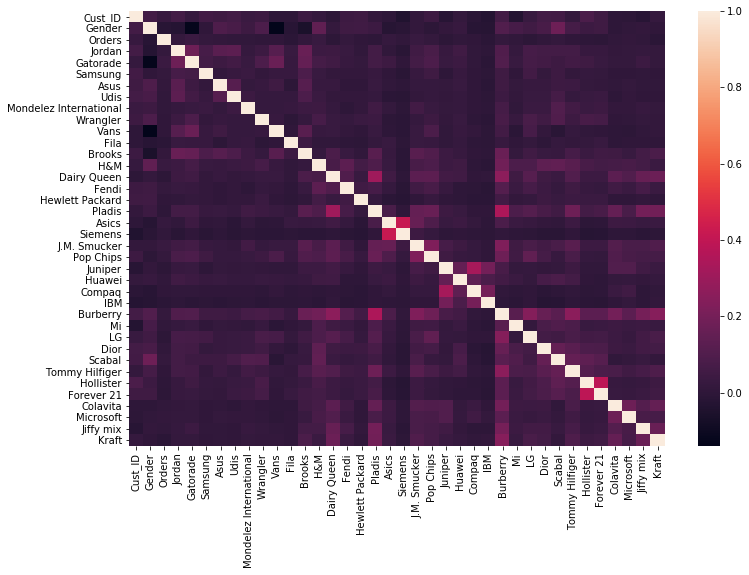

In [9]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(12,8))

cor=data.corr()
sns.heatmap(cor)

In [10]:
from sklearn.cluster import KMeans

model=KMeans(n_clusters=2)
model.fit(data) 

KMeans(n_clusters=2)

In [11]:
a=model.labels_
print(a)

[0 0 0 ... 1 1 1]


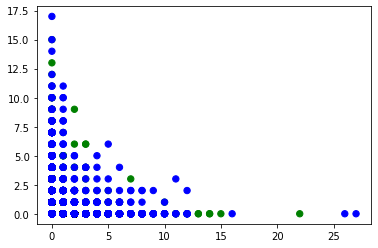

In [12]:
import numpy as np
colormap=np.array(['green','blue','yellow','red'])
plt.scatter(data.Samsung,data.Asus,c=colormap[model.labels_],s=40)

In [14]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

X=data

km = KMeans(n_clusters=2, random_state=42)

km.fit_predict(X)

# Calculate Silhoutte Score

score = silhouette_score(X, km.labels_, metric='euclidean')

# Print the score

print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.627
